# Guided Project: Clean And Analyze Employee Exit Surveys 


For this particular project, the data that I cleaned were the exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. There were two questions that I wanted to answer for this project as a data analyst: 

1) Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer? 

2) Are younger employees resigning due to some kind of dissatisfaction? What about older employees? 

The first step is to answer the first question and then proceed ton to answer the next question. 

## Step 1: Import Libraries and Read in the Data 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Analyze dete_survey data first
dete_survey = pd.read_csv('dete_survey.csv')
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
#Analyze the tafe_survey data
tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


For the Dete data set, there are a few observations that can be seen. The dete_survey dataframe contains 'Not Stated' values that are supposed to symbolize missing values but they are not represented as NaN. Also, both the dete_survey and tafe_survey dataframes contain columns that we don't need for our analysis. There are multiple columns that are the same with the exception that the column names are different. Lastly, there are multiple answers/columns that show an employee resigned because they were dissatisfied. 

## Step 2: Identify Missing Values and Drop Unnecessary Columns

In [4]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)


In the previous cell with the 3 lines of code, I dropped those specific columns because they were not important in my analysis. Also, I changed the 'Not Stated' to NaN to avoid dealing with string NaN values and just make all the NaN values standard.  

In [5]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.head()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

## Step 3: Update the Column Names in Both Data Sets 

In [6]:
cols = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment':'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type':'employment_status', 'Classification. Classification':'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)' : 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns = cols)
tafe_survey_updated.columns
tafe_survey_updated.head()
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In the above cell, I made some updates on the columns in both data sets because we will want to combine them. Therefore, both columns should have a standard with regard to the names.

In [7]:
dete_survey_updated['separationtype'].value_counts()
tafe_survey_updated['separationtype'].value_counts()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']
tafe_resignations.head()
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.match('Resignation')]
dete_resignations.head()
tafe_resignations = tafe_resignations.copy()
dete_resignations = dete_resignations.copy()

## Step 4: Filter Data and Verify Date Columns

So, after updating the above cell, I made two updates to the two datasets. For the DETE updated data, I extracted all rows that had 'Resignation' in it from the separationtype column and for the TAFE updated data set, I did the exact same thing. This will help answer question 1 very soon. The next step in this project is to verify that the data does not have any major inconsistencies. I will look at the cease_date and dete_start_date columns to see if they make sense. If there are many years higher than the current date or lower than 1940, we cannot continue the analysis, as it would be detrimental.

In [8]:
dete_resignations['cease_date'].value_counts()
dete_resignations['cease_date'] = pd.to_datetime(dete_resignations['cease_date'])
dete_resignations['cease_date'].dt.year.value_counts()
dete_resignations['cease_date'] = dete_resignations['cease_date'].dt.year.astype('float')
print(dete_resignations['cease_date'].value_counts().sort_index())
print('\n')
print(dete_resignations['dete_start_date'].value_counts().sort_index())


2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64


1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


In [9]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

From the analysis done of the dates, there aren't any major issues with the years. Also, though, the years don't span the same number of years, however, I think it's safe to not drop any years.

## Step 5: Create a New Column in DETE Resignation Set 

For this particular step, we are creating a new column to analyze the length of time an employee spent in a workplace. Since the TAFE resignation data set already contains a service column, there is no need to create a new one. 

In [10]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Step 4: Identify Employees who Resigned due to Dissatisfaction

In [11]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [12]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna = False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [13]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(1, skipna = False)
dete_resignations_up = dete_resignations.copy()
dete_resignations['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

In this step, we created a new column to classify the dissatisfied employees. In order to create this column, we converted values in the TAFE registratoin columns 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' by converting to values of True, False and NaN where appropriate. So far, the steps we have taken so far are of the following: 

1) Renamed the columns 

2) Dropped any data not needed for the analysis

3) Verified the quality of our data

4) Created a new column called institute_service

5) Cleaned the Contributing Factors columns

6) Created a new column indicating if an employee resigned because they were dissatisfied in some way. 

The step we will do now is to combine our datasets. The goal of this is to aggregate the data according to the institute_service column. The changes we made are shown in the cell below. 

## Step 6: Combine the Data

In [14]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations], ignore_index = True)
print(combined.notnull().sum().sort_values())
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
lack_of_job_security                                   311
job_dissatisfaction                                    311
employment_conditions                                  311
work_location                                          311
interpersonal_conflicts                                311
dissatisfaction_with_the_department                    3

## Step 7: Clean institute_service column

In order to analyze the data, we have to clean the column due to the fact it contains values in different forms. We'll change it to these follwoing categories. 

1) New: Less than 3 years at a company

2) Experienced: 3-6 years at a company

3) Established: 7-10 years at a company

4) Veteran: 11 or more years a company


In [15]:
combined_updated['institute_service'].value_counts(dropna = False)
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [16]:
def transform(val):
    if val >= 11:
        return 'Veteran'
    elif 7 <= val <= 10:
        return 'Established'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif pd.isnull(val):
        return np.nan
    else: 
        return 'New'
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform)
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

As a result of the steps done above, I finally managed to categorize the employees according to the amount of years spent in their workplace into categories. The categories are 'New', 'Experienced', 'Veteran', and 'Establsihed' for the service category column. 

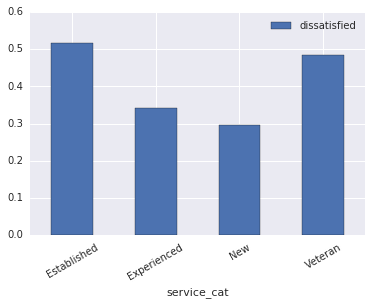

In [24]:
combined_updated['dissatisfied'].value_counts(dropna = False)
combined_updated['dissatisfied'] = combined['dissatisfied'].fillna(False)
pct = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')
%matplotlib inline
pct.plot(kind = 'bar', rot = 30)


## Conclusion 


As a result, we can see that the proportion of dissatisfied employees were in the 'Established' group. 